# (1) Data Description (2 or 3 sentences and no more than 1 table)
Provide a brief description of the dataset assigned to your group. Note that the dataset will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. Regardless of which variables you plan to use, provide a full descriptive summary of the dataset.

You may want to use a table or bullet points to describe the variables in the dataset. At a minimum, you should include information on:

number of observations
number of variables
name and type of variables
IMPORTANT: if known, indicate how the data has been collected. In all cases, include the data source and citation as requested by the owner(s)

The Restaurant Revenue Prediction Dataset is a simulated dataset focusing on forecasting monthly revenue for a set of imaginary restaurants. It offers a diverse range of features designed to mimic the factors influencing real-world restaurant performance. 

- number of observations: 1000 

- number of variables: 8

- name and type of variables:

    - Number_of_Customers      : numeric - double
    - Menu_Price               : numeric - double
    - Marketing_Spend          : numeric - double
    - Cuisine_Type             : character 
    - Average_Customer_Spending: numeric - double
    - Promotions               : numeric - double
    - Reviews                  : numeric - double
    - Monthly_Revenue          : numeric - double

- how the data has been collected: It was generated using random data generation techniques (Python and Numpy) to simulate various aspects of restaurant operations.

- citation: MrSimple07. (2024). Restaurants Revenue Prediction [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/7420974

In [63]:
library(tidyverse)
library(dplyr)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(MASS)
library(tidymodels)
library(mltools)
library(leaps)
library(modelr)
library(ggplot2)
library(gridExtra)

In [64]:
setwd("/home/jovyan/work/stat-301/Project")

In [68]:
revenue <- read_csv("https://raw.githubusercontent.com/athuwyl/dsci301/main/Restaurant_revenue%20(1).csv") # the dataset can be loaded into R

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Cuisine_Type
dbl (7): Number_of_Customers, Menu_Price, Marketing_Spend, Average_Customer_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [69]:
str(revenue)

spc_tbl_ [1,000 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Number_of_Customers      : num [1:1000] 61 24 81 70 30 92 96 84 84 97 ...
 $ Menu_Price               : num [1:1000] 43.1 40 42 43 17.5 ...
 $ Marketing_Spend          : num [1:1000] 12.66 4.58 4.65 4.42 3.48 ...
 $ Cuisine_Type             : chr [1:1000] "Japanese" "Italian" "Japanese" "Italian" ...
 $ Average_Customer_Spending: num [1:1000] 36.2 18 22.6 19 12.8 ...
 $ Promotions               : num [1:1000] 0 0 1 1 1 1 0 1 0 0 ...
 $ Reviews                  : num [1:1000] 45 36 91 59 30 10 86 1 26 98 ...
 $ Monthly_Revenue          : num [1:1000] 351 221 327 348 185 ...
 - attr(*, "spec")=
  .. cols(
  ..   Number_of_Customers = col_double(),
  ..   Menu_Price = col_double(),
  ..   Marketing_Spend = col_double(),
  ..   Cuisine_Type = col_character(),
  ..   Average_Customer_Spending = col_double(),
  ..   Promotions = col_double(),
  ..   Reviews = col_double(),
  ..   Monthly_Revenue = col_double()
  .. )
 - attr(*, 

In [70]:
sapply(revenue, typeof)

Number_of_Customers                Menu_Price           Marketing_Spend 
                 "double"                  "double"                  "double" 
             Cuisine_Type Average_Customer_Spending                Promotions 
              "character"                  "double"                  "double" 
                  Reviews           Monthly_Revenue 
                 "double"                  "double"

# (2) Question (2 or 3 sentences)
a) Clearly state the question you want try to answer using the dataset. Your question should involve one random variable of interest (the response) and more than one explanatory variables in the dataset. 

IMPORTANT: if you have been assigned a Poisson model, then your question should be such that it can be answered with a Poisson model.

b) Explain whether your question is focused on prediction, inference, or both. 

NOTE: It is fine to have the same question as other group members but each member must have their own explanation. Again, you don’t need to agree on a unique common question for now. In fact, usually many questions can be answered with the same dataset. 

a) Question: Can we use Number_of_Customers, Menu_Price, Marketing_Spend, Cuisine_Type, Average_Customer_Spending, and Promotions to predict monthly restaurant revenue?

    Response Variable: 
    - Monthly_Revenue (Simulated monthly revenue, the target variable for prediction)

    Explanatory Variables: 
    - Number_of_Customers (The count of customers visiting the restaurant), 
    - Menu_Price (Average menu prices at the restaurant),   
    - Marketing_Spend (Expenditure on marketing activities), 
    - Cuisine_Type (The type of cuisine offered (Italian, Mexican, Japanese, American)), 
    - Average_Customer_Spending (Average spending per customer), 
    - Promotions (Binary indicator (0 or 1) denoting whether promotions were conducted).

We removed Reviews because it might be intentionally manipulated not to reflect the true quality of the restaurant, which means it is not a valid input variable for obtaining and predicting Monthly_Revenue. 


b) The question is focused on prediction (to predict monthly revenue based on the changes and interactions of all the input variables except Reviews).

# (3) Exploratory Data Analysis and Visualization (no more than one plot per student)
In this part, you will write a reproducible code to:

Demonstrate that the dataset can be loaded into R.
Clean and wrangle your data into a tidy format.
Propose a visualization that you consider relevant to address your question or to explore the data.
propose a high-quality, creative plot (you are allowed to use facets to explore a plot according to values of another variable)
explain why you consider this plot relevant to address your question or to explore the data
NOTE: this visualization does not have to illustrate the results of a methodology. Instead, you are exploring which variables are relevant, potential problems that you anticipate encountering, groups in the observations, etc. Be creative and ambitious with your plot! Try to explore at least 3 variables at once!!

In [71]:
revenue <- read_csv("https://raw.githubusercontent.com/athuwyl/dsci301/main/Restaurant_revenue%20(1).csv") # the dataset can be loaded into R

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Cuisine_Type
dbl (7): Number_of_Customers, Menu_Price, Marketing_Spend, Average_Customer_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [75]:
revenue_new <- revenue %>% 
            na.omit() %>% # omit any missing value
            mutate(Promotions = as.factor(Promotions),
                  Cuisine_Type = as.factor(Cuisine_Type)) # change Promotions from type double to factor for analysis
            
revenue_new <- revenue_new %>% 
               dplyr::select(-Reviews) # Remove the variable I don't need
            
head(revenue_new)

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,350.9120
24,40.02008,4.577892,Italian,17.95256,0,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,326.5298
70,43.00531,4.416053,Italian,18.98410,1,348.1906
30,17.45620,3.475052,Italian,12.76614,1,185.0091
92,19.42767,13.114473,American,43.09995,1,399.8675


In [76]:
neg_rev <- revenue_new %>%
           filter(Monthly_Revenue < 0)

neg_rev # Note that sometimes the monthly revenue is negative; but since this is a simulated data, we would not dive into this

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
11,32.62033,5.0611687,American,33.76198,1,-28.977809
10,11.31387,2.2791327,Italian,16.07545,1,-27.610276
17,22.45893,0.8747125,American,35.28077,1,-25.453430
13,36.13052,0.8111748,Mexican,43.11906,1,-28.920890
10,33.08741,6.0097877,American,15.33378,1,-7.627382


# (3) Continued

Propose a visualization that you consider relevant to address your question or to explore the data.

propose a high-quality, creative plot (you are allowed to use facets to explore a plot according to values of another variable)

explain why you consider this plot relevant to address your question or to explore the data

NOTE: this visualization does not have to illustrate the results of a methodology. Instead, you are exploring which variables are relevant, potential problems that you anticipate encountering, groups in the observations, etc. Be creative and ambitious with your plot! Try to explore at least 3 variables at once!!

Answer: 

I propose to generate scatter plots with a smoothed line visualizing the trend. This plot is relevant in the sense that it explores whether there exists a positive linear relationship between Monthly_Revenue and Number_of_Customers, and whether the association between Monthly_Revenue and Number_of_Customers varies across different Cuisine_Type and Promotions; in other words, whether the effect of the number of customers visiting on monthly revenue will change based on cuisine types and the presence of promotion strategies.

The almost upward sloping line in each facet indicates a potentially significant positive relationship between Monthly_Revenue and Number_of_Customers, suggesting that Number_of_Customers might be a strong predictor. In addition, since the association doesn't seem to vary much across facets (in both cases), we should test whether an interactive model (categorical variable*continuous variable) is necessary. 

Lastly, the boxplot suggests that Cuisine_Type could influence Monthly_Revenue, and Promotions do not always increase Monthly_Revenue, which is counter-intuitive (Promotions are assumed to increase Monthly_Revenue). However, whether these observations are significant are open to further analysis, including by adding other continuous variables in a multiple linear regression.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


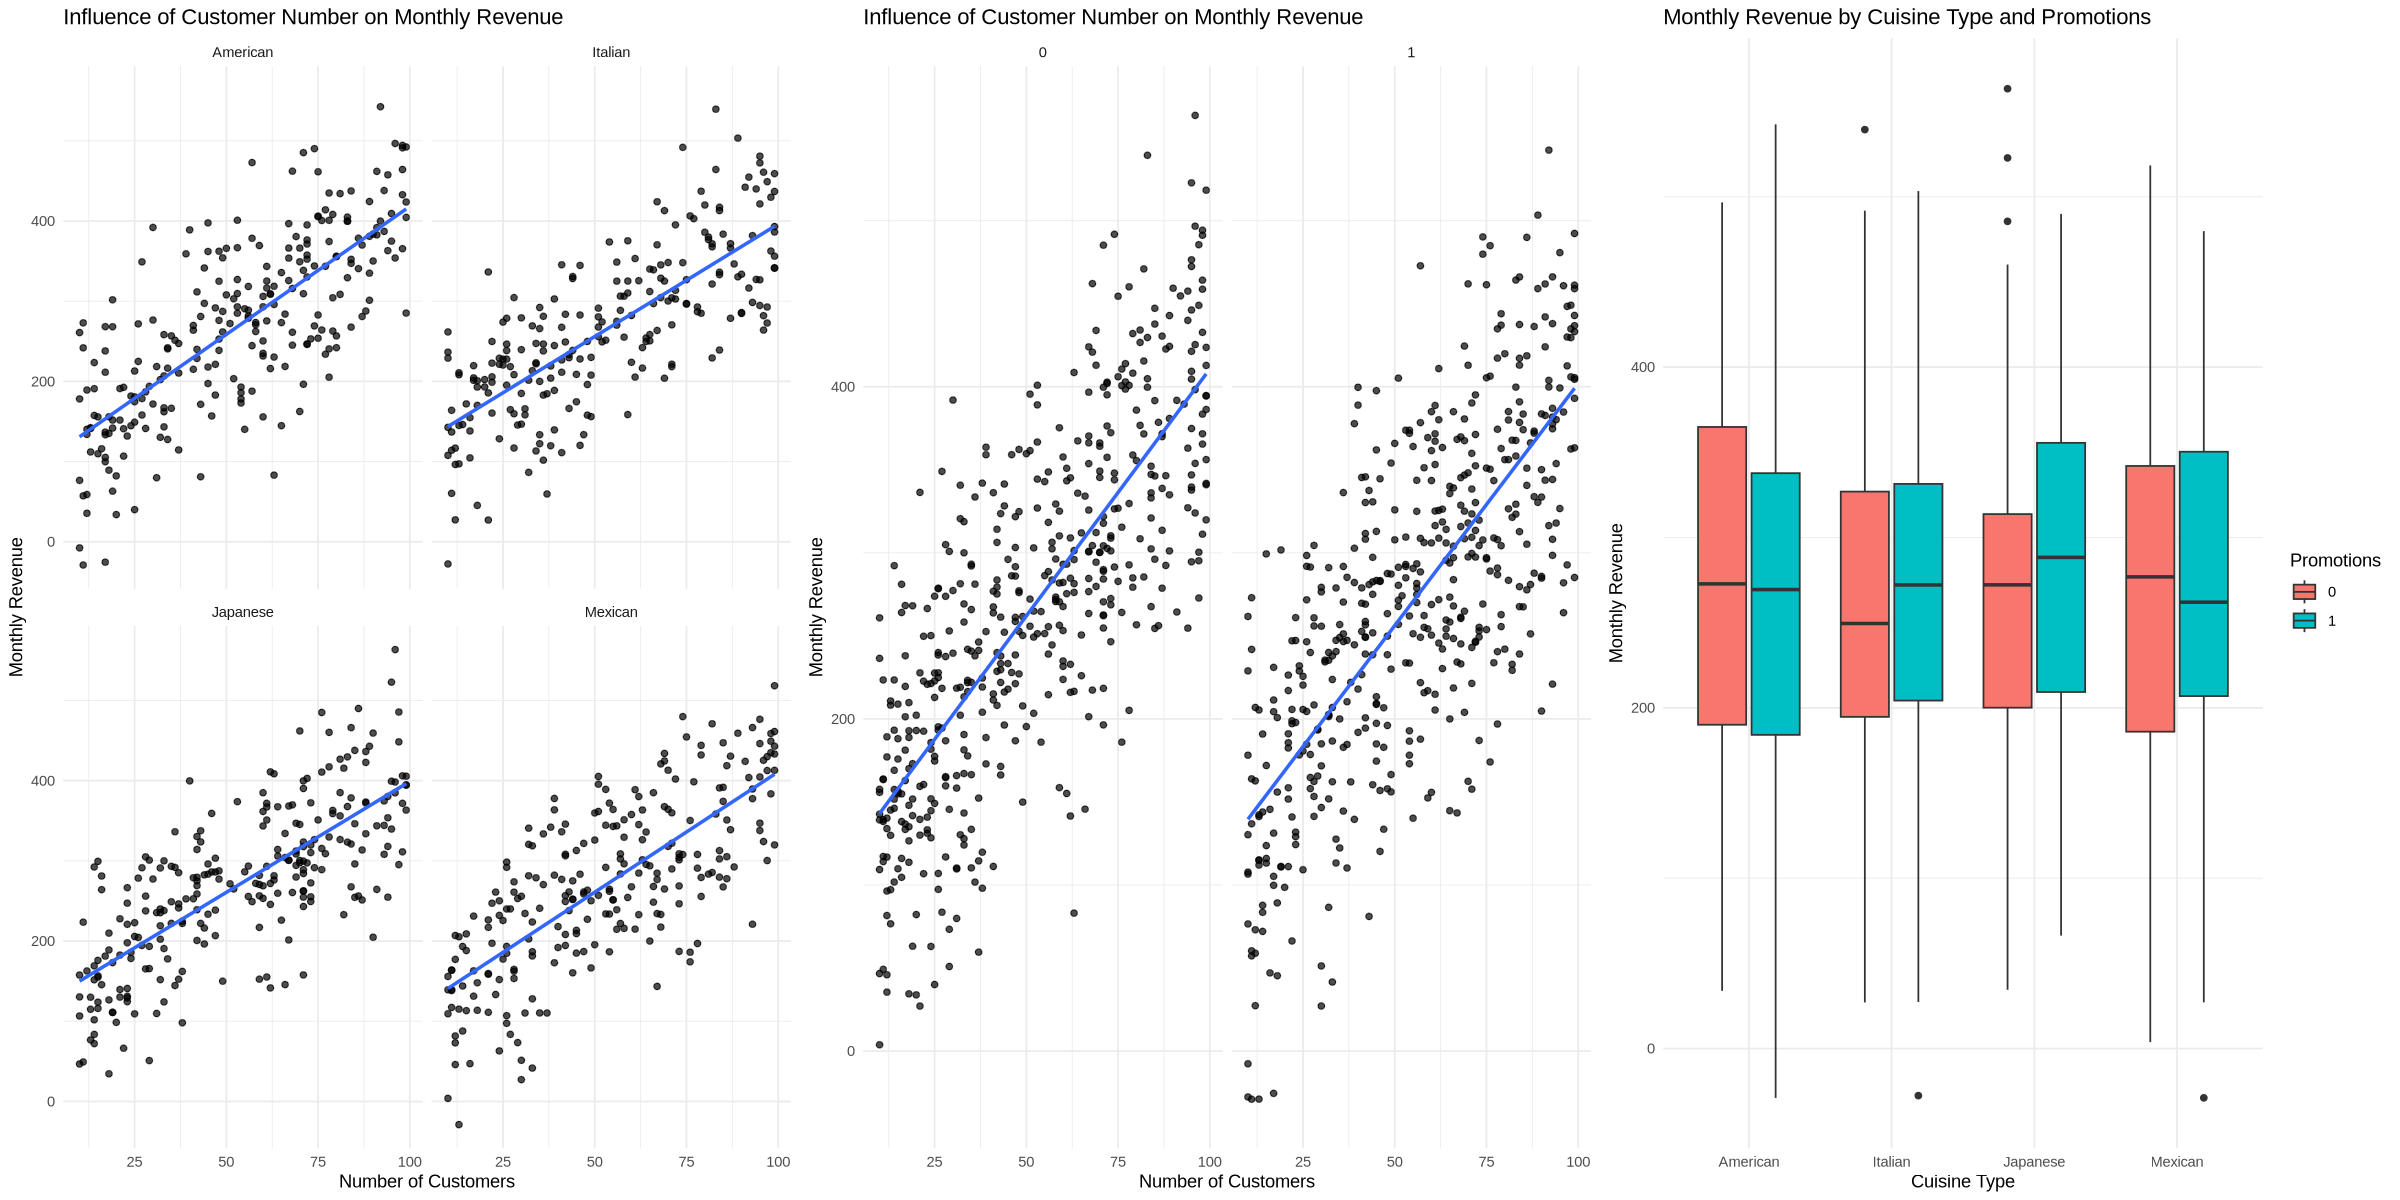

In [77]:
# Make plots wider 
options(repr.plot.width=20, repr.plot.height=10)

# Create the plot
p1 <- ggplot(revenue_new, aes(x = Number_of_Customers, y = Monthly_Revenue)) +
  geom_point(alpha = 0.7) +  # Scatter plot with transparency
  geom_smooth(method = "lm", linewidth = 1, se = FALSE, aes(group = 1)) +  # Linear trend line with `linewidth`
  facet_wrap(~ Cuisine_Type) +  # Separate plots by Cuisine_Type
  labs(
    title = "Influence of Customer Number on Monthly Revenue",
    x = "Number of Customers",
    y = "Monthly Revenue") + 
  theme_minimal()  # Clean and minimal theme

p2 <- ggplot(revenue_new, aes(x = Number_of_Customers, y = Monthly_Revenue)) +
  geom_point(alpha = 0.7) +  # Scatter plot with transparency
  geom_smooth(method = "lm", linewidth = 1, se = FALSE, aes(group = 1)) +  # Linear trend line with `linewidth`
  facet_wrap(~ Promotions) +  # Separate plots by Cuisine_Type
  labs(
    title = "Influence of Customer Number on Monthly Revenue",
    x = "Number of Customers",
    y = "Monthly Revenue") + 
  theme_minimal()  # Clean and minimal theme


# Create a boxplot to visualize the effect of Cuisine_Type and Promotions on Monthly_Revenue
p3 <- ggplot(revenue_new, aes(x = Cuisine_Type, y = Monthly_Revenue, fill = as.factor(Promotions))) +
  geom_boxplot() +
  labs(
    title = "Monthly Revenue by Cuisine Type and Promotions",
    x = "Cuisine Type",
    y = "Monthly Revenue",
    fill = "Promotions"
  ) +
  theme_minimal()

grid.arrange(p1, p2, p3, nrow = 1)

# Assignment2

# (1) Methods and Plan
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Just a high-level thinking of what model you are planning to use. 

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
Note 1: you can relax/expand your question(s) from assignment 1, just change them in the corresponding section from previous assignment.


I propose to use multiple linear regression (additive). We'll check the MLR assumptions first. Meanwhile, we'll use forward/backward model selection to help filter predictors.

Assumptions: 
1) Linearity: The relationship between the response variable and the input variables should be linear in the coefficients. This means the effect of each input variable on the outcome variable should be additive and proportional.
2) Independence: Observations must be independent of one another. For example, there should be no correlation between residuals of different observations.
3) Homoscedasticity: The variance of residuals (errors) should remain constant across all levels of the independent variables.
4) Normality of Residuals: Residuals should be approximately normally distributed (crucial when performing hypothesis tests).
5) Multicollinearity: Input variables should not be highly correlated with each other. High multicollinearity can make it difficult to estimate the effect of each input variable accurately.
6) Model Specification: The model should include all relevant input variables and exclude irrelevant ones. Omitted variables or inclusion of unnecessary variables can bias results or increase variance.

Potential limitations:
1) What if any of the assumptions above are violated? For example, could the relationship be better accounted for by a nonlinear model?
2) Multiple linear regression either includes or excludes an input variable, but what if shrinking an input variable could produce better results?
3) MLR models are built on the data provided during training and assume that the relationships hold true within that range. When you try to extrapolate (make predictions outside the observed range of predictors), the model's predictions can become highly unreliable because it assumes the same linear relationship applies beyond the range of the data.

# (2)  Computational Code and Output

In this section you will implement the method suggested in part (1).  

a) & b) Write a computation code to implement the method proposed in part (1)

In [78]:
# separate the training data from the testing data
revenue_split <- 
    revenue_new %>%
    initial_split(prop = 0.6, strata = Monthly_Revenue) 

training_revenue <- training(revenue_split)
testing_revenue <- testing(revenue_split)

In [79]:
# this is an additive model trained with training data
mlr_full <- lm(Monthly_Revenue~., data = training_revenue)
mlr_full


Call:
lm(formula = Monthly_Revenue ~ ., data = training_revenue)

Coefficients:
              (Intercept)        Number_of_Customers  
                   0.3728                     2.9337  
               Menu_Price            Marketing_Spend  
                   2.3998                     4.9239  
      Cuisine_TypeItalian       Cuisine_TypeJapanese  
                  -5.1341                    -6.4112  
      Cuisine_TypeMexican  Average_Customer_Spending  
                  -0.8385                    -0.1343  
              Promotions1  
                  -4.1488  


In [80]:
# backward model selection using stepwise algorithm because:
# 1) we have two categorical variables
# 2) we don't have too many predictors, so it might be better to eliminate any unnecessary ones rather than adding
n <- nrow(training_revenue) # used to generate the penalty term, note that n is the number of observations
AIC_back <- stepAIC(mlr_full, direction = "backward", k = log(n))
summary(AIC_back)

Start:  AIC=4955.38
Monthly_Revenue ~ Number_of_Customers + Menu_Price + Marketing_Spend + 
    Cuisine_Type + Average_Customer_Spending + Promotions

                            Df Sum of Sq     RSS    AIC
- Cuisine_Type               3      4541 2109792 4937.5
- Average_Customer_Spending  1      1392 2106643 4949.4
- Promotions                 1      2531 2107781 4949.7
<none>                                   2105251 4955.4
- Menu_Price                 1    449664 2554915 5065.1
- Marketing_Spend            1    477417 2582668 5071.6
- Number_of_Customers        1   3560831 5666082 5543.0

Step:  AIC=4937.48
Monthly_Revenue ~ Number_of_Customers + Menu_Price + Marketing_Spend + 
    Average_Customer_Spending + Promotions

                            Df Sum of Sq     RSS    AIC
- Average_Customer_Spending  1      1274 2111066 4931.4
- Promotions                 1      2480 2112272 4931.8
<none>                                   2109792 4937.5
- Menu_Price                 1    457035 


Call:
lm(formula = Monthly_Revenue ~ Number_of_Customers + Menu_Price + 
    Marketing_Spend, data = training_revenue)

Residuals:
     Min       1Q   Median       3Q      Max 
-171.379  -39.867    0.974   41.716  168.014 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -8.62944    9.14908  -0.943    0.346    
Number_of_Customers  2.92600    0.09209  31.772   <2e-16 ***
Menu_Price           2.40248    0.21211  11.327   <2e-16 ***
Marketing_Spend      4.92817    0.41824  11.783   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 59.55 on 596 degrees of freedom
Multiple R-squared:  0.6918,	Adjusted R-squared:  0.6903 
F-statistic:   446 on 3 and 596 DF,  p-value: < 2.2e-16


In [81]:
vif(AIC_back) # calculate the VIF of the selected model to check multicollinearity; we focus on GVIF since we have dummy variables with more than 2 levels
#anova(mlr_full, AIC_back, test = "F") # compare the mlr_full with the selected model

Number_of_Customers          Menu_Price     Marketing_Spend 
           1.002407            1.001684            1.001987

Rule of thumb: GVIF values significantly higher than 10 (or adjusted GVIF much greater than 2) may indicate multicollinearity.

Explanation: Since all GVIF and adjusted GVIF are close to 1, the predictors are not strongly correlated, which means multicollinearity is not a concern in this model.

**Please ignore the notes here:**
If you're comparing a reduced model to the full model, you should list the full model first.

This approach tests the null hypothesis: The reduced model fits the data as well as the full model.

It evaluates whether the variables removed in the reduced model significantly contribute to explaining the variation in the data.

c) Use only one visualization or table to report results.

In [82]:
tidy(AIC_back)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8.629435,9.14907770,-0.9432027,3.459594e-01
Number_of_Customers,2.925995,0.09209415,31.7717847,2.345876e-130
Menu_Price,2.402478,0.21211094,11.3265185,4.530470e-27
Marketing_Spend,4.928167,0.41824013,11.7831044,5.896169e-29


d) In 3 or 4 sentences give a brief interpretation of the results. If needed, comment on any unexpected result or potential problems with the analysis, and possible ways to address issues encountered. If results are as expected, explain how they address the question of interest. **Do not exceed the 4 sentences limit**.

Answer: It seems that only Number_of_Customers, Menu_Price, Marketing_Spend are selected as predictors by the backward stepwise algorithm. There is no multicollinearity in the selected model, as you can see from the  computed GVIF values (all close to 1). Lastly, we can see that the coefficients on the predictors are all significant.

In [83]:
#plot(AIC_back) # a diagnostic plot of underlying assumptions (for future use)